In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# need to be able to deal with a derivate of zero for newton-raphson

In [31]:
# function classes
# is this any more useful than a definition
# potentially for the engine

# roots: x = -2.49771,1.20296,3.39475
class function_cubic:
    def __init__(self,interval):
        print('Creating function: cubic')
        self.interval = interval
          
    # compute function 
    def get_value(self,x):
        return 10.2-7.4*x-2.1*x*x+x*x*x
    
    # compute derivative
    def get_derivative(self,x):
        return -7.4*x-4.2*x+3*x*x
    
    def interval(self):
        return self.interval

class function_exp:
    def __init__(self,interval):
        print('Creating function: exponential')
        self.interval = interval
       
    # compute function 
    def get_value(self,x):
        return np.exp(x)-2
    
    # compute derivative
    def get_derivative(self,x):
        return np.exp(x)

    def interval(self):
        return self.interval
    
class function_sinusodial:
    def __init__(self,interval):
        print('Creating function: sinusoidal')
        self.interval = interval
        
    # compute function
    def get_value(self,x):
        return np.cos(x)*np.sin(3*x)
    
    # compute derivative
    def get_derivative(self,x):
        return np.sin(x)*np.sin(3*x)-3*np.cos(x)*np.cos(3*x)

    def interval(self):
        return self.interval

In [87]:
# root finding algorithms

class step_bisection:
    def iterate(self,function,pair):
        centre = float(pair[0]+pair[1])/2
        if function.get_value(pair[0]) < 0 and function.get_value(centre) < 0 \
            or function.get_value(pair[0]) > 0 and function.get_value(centre) > 0:
                return([centre,pair[1]])
        elif function.get_value(pair[1]) < 0 and function.get_value(centre) < 0 \
            or function.get_value(pair[1]) > 0 and function.get_value(centre) > 0:
                return([pair[0],centre])
        else:
            print('None type returned in bisection method')
            return pair
        
# newton raphson
class step_nr:
    def iterate(self,function,pair):
        return [pair[0]-float(function.get_value(pair[0]))/function.get_derivative(pair[0]),pair[1]]

# secant
class step_secant:
    # f(x) = mx+c
    # f(x0)-mx0 = c
    def iterate(self,function,pair):
        f0 = function.get_value(pair[0])
        f1 = function.get_value(pair[1])
        m = float(f1-f0)/(pair[1]-pair[0])
        c = function.get_value(pair[0])-m*function.get_value(pair[0])
        # m*x+c = 0
        x1 = pair[0]
        x2 = -float(c)/m
        return [x1,x2]
        

In [88]:
# engine to run everything
class engine:
    def __init__(self,function,step,title):
        self.function = function
        self.step = step
        self.title = title
        
    def run(self,error):
        # initiate results set
        results = [self.function.interval]
        
        # counter
        n = 0
                
        # iterate algortihm
        while n < np.log2((results[0][1]-results[0][0])/error):
            results.append(self.step.iterate(self.function,results[n]))
            n += 1
            
        print('Engine has finished with '+self.title) 
        return results                 

In [89]:
def main(in_function,error,bounds):
    
    print('Running root finder for '+in_function+' for an error of '+str(error))
    
    # create function
    if in_function == 'cubic':
        function = function_cubic(bounds)
    elif in_function == 'exp':
        function = function_exp(bounds)
    elif in_function == 'sin':
        function = function_sinusodial(bounds)
    else: 
        print('Incorrect function input')
        
    # create ... objects
    bisection_step = step_bisection()
    bisection_engine = engine(function,bisection_step,'bisection method')
    
    nr_step = step_nr()
    nr_engine = engine(function,nr_step,'newton-raphson method')
    
    secant_step = step_secant()
    secant_engine = engine(function,secant_step,'secant method')
    
    # get results
    results_bisection = bisection_engine.run(error)
    results_nr = nr_engine.run(error)
    results_secant = secant_engine.run(error)
    
    # plot results
    plt.figure(figsize=(20,10))
    interval = function.interval
    plt.plot([x for x in np.arange(interval[0],interval[1],0.1)],
             [function.get_value(x) for x in np.arange(interval[0],interval[1],0.1)])
    #plt.plot([row[0] for row in results_bisection],
    #          [function.get_value(row[0]) for row in results_bisection])
    plt.plot(results_bisection[-1],[0,0],'o')
    plt.plot(results_nr[-1][0],[0],'o')
    for i,row in enumerate(results_bisection):
        plt.axvline(row[0],0.2,0.4,c='k',ls='--')
        plt.axvline(row[1],0.2,0.4,c='k',ls='--')
    plt.grid()
    plt.xlim(bounds[0]-0.2,bounds[1]+0.2)
    
    print('Bisection method root: '+str(results_bisection[-1]))
    print('Newton-raphson method root: '+str(results_nr[-1][0]))
    print('Secant method root:'+str(results_secant[-1]))
    

Running root finder for cubic for an error of 0.001
Creating function: cubic
Engine has finished with bisection method
Engine has finished with newton-raphson method
Engine has finished with secant method
Bisection method root: [0.19921875, 0.2]
Newton-raphson method root: 1.21336814599
Secant method root:[0.1, 9.282673710445936]


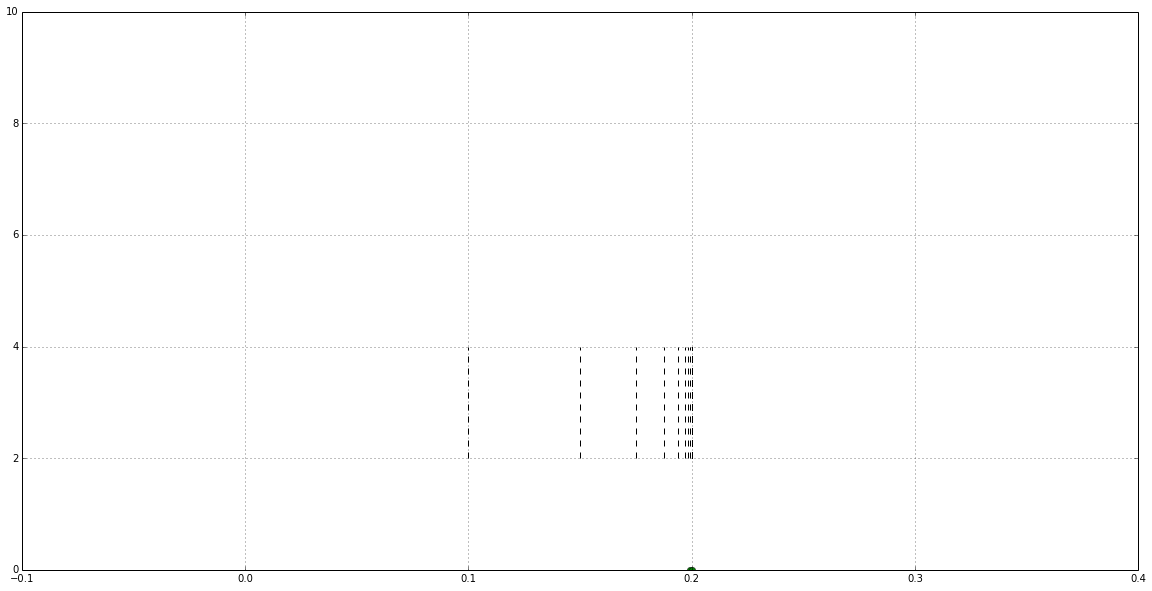

In [90]:
main('cubic',0.001,[0.1,0.2])

Running root finder for cubic for an error of 0.001
Creating function: cubic
Engine has finished with bisection method
Engine has finished with newton-raphson method
(3, -1.9400000000000084)
(-1.9400000000000084, -9.15750399999995)
(-9.15750399999995, -2235.6224387861944)
(-2235.6224387861944, -6879546386.79005)
(-6879546386.79005, 2.037284319974281e+29)
(2.037284319974281e+29, 2.1969766453999655e+88)
(2.1969766453999655e+88, 6.522792690723996e+264)
(6.522792690723996e+264, nan)
(nan, nan)
(nan, nan)
(nan, nan)
Engine has finished with secant method
Bisection method root: [1.2021484375, 1.203125]
Newton-raphson method root: 1.20295728372
Secant method root:[nan, nan]


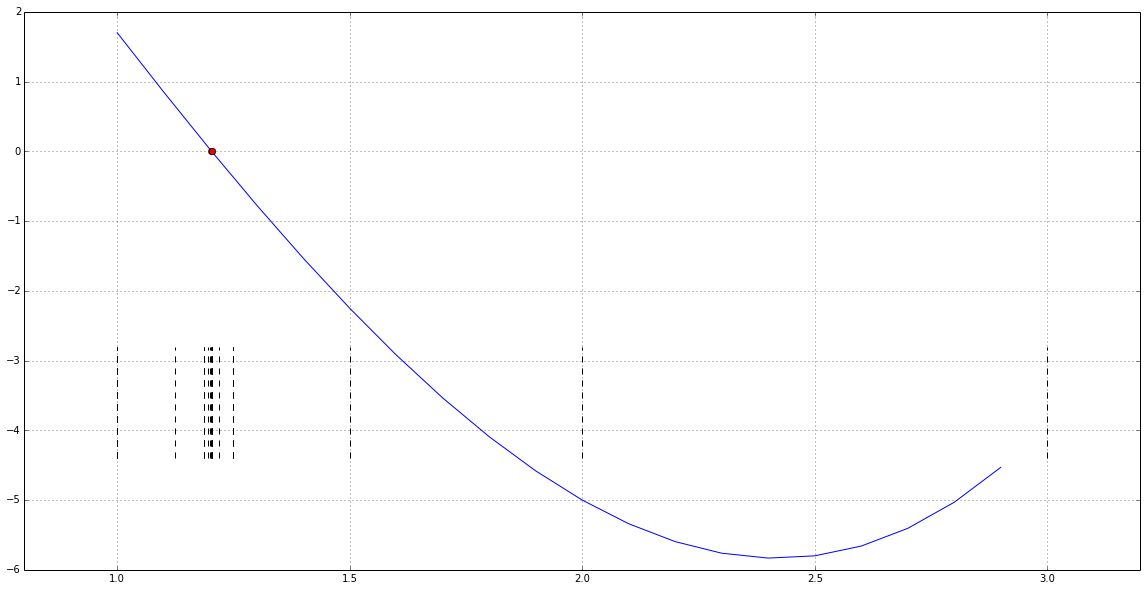

In [65]:
main('cubic',0.001,[1,3])

Running root finder for cubic for an error of 0.001
Creating function: cubic
Engine has finished with bisection method
Engine has finished with newton-raphson method
(4, 47.749999999999986)
(47.749999999999986, 87144.7906249999)
(87144.7906249999, -126106575231178.38)
(-126106575231178.38, -1.2529661008950767e+43)
(-1.2529661008950767e+43, -1.6522202142811107e+129)
(-1.6522202142811107e+129, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
Engine has finished with secant method
Bisection method root: [-2.4984130859375, -2.49755859375]
Newton-raphson method root: -2.49790586867
Secant method root:[nan, nan]


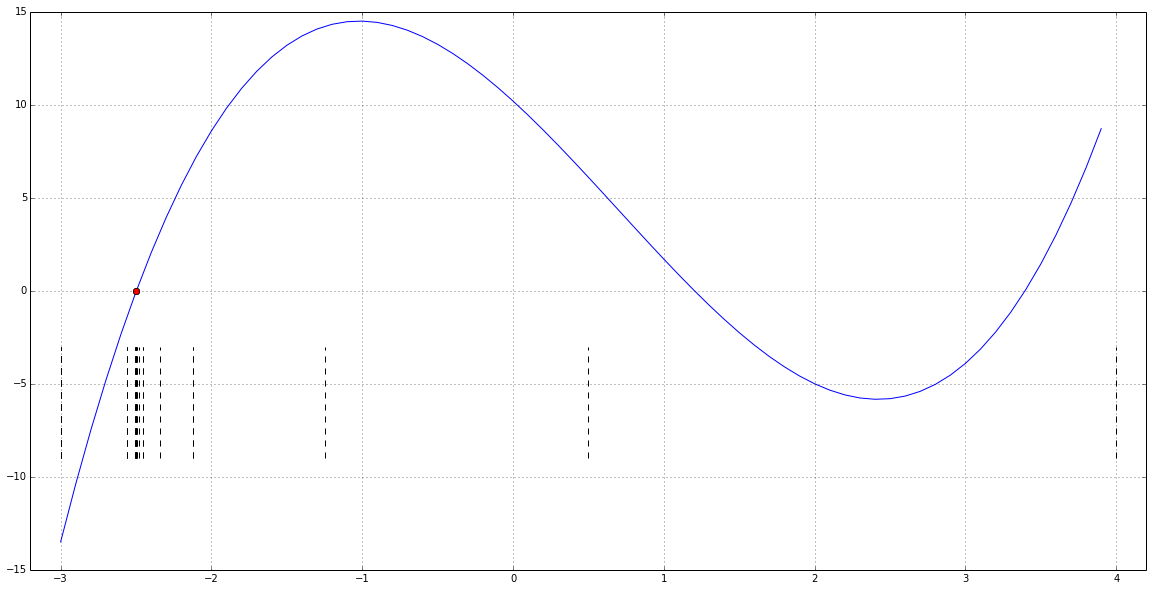

In [69]:
main('cubic',0.001,[-3,4])

In [41]:
exp.interval

[0, 20]